In [1]:
import sys

sys.path.insert(1, '../..')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from functions.other_functions import process_date, chi2, linear

# from tqdm import tqdm_notebook
%matplotlib inline 

In [3]:
ch0_file = open("/Users/willquinn/Desktop/Results/1000V/resolution_vs_date_Ch0.dat","r")
ch1_file = open("/Users/willquinn/Desktop/Results/1000V/resolution_vs_date_Ch1.dat","r")
files = [ch0_file, ch1_file]

data = [[],[]]

for i_file in range(len(files)):
    for i_line in files[i_file].readlines():
        if len(i_line.split(",")) < 5:
            continue
        else:
            pass
        cols = i_line.split(",")
        date = cols[1].strip()
        res = (float(cols[5].strip())/float(cols[3].strip())) * 100
        res_err = np.sqrt( (float(cols[6].strip())/float(cols[5].strip()) )**2 + (float(cols[4].strip())/float(cols[3].strip())**2) ) * res
        chi_2_ = float(cols[-1].strip())
        mu = float(cols[3].strip())
        mu_err = float(cols[4].strip())
        sig = float(cols[5].strip())
        sig_err = float(cols[6].strip())
        if "." in date or chi_2_ > 2:
            pass
        else:
            data[i_file].append((int(date), mu, mu_err, sig, sig_err, res, res_err, chi_2_))
            '''dates[i_file].append(int(date))
            resolutions[i_file].append(res)
            resolutions_errs[i_file].append(res_err)
            chi2s[i_file].append(float(cols[-1].strip()))'''
        

In [4]:
data_ch0 = np.array(data[0], dtype=[('date', 'i4'), ('mu', 'f4'), ('mu_err', 'f4'), ('sig', 'f4'), ('sig_err', 'f4'), ('resolution', 'f4'), ('error', 'f4'), ('chi2', 'i4')])
data_ch0 = np.sort(data_ch0, order='date') 
data_ch1 = np.array(data[1], dtype=[('date', 'i4'), ('mu', 'f4'), ('mu_err', 'f4'), ('sig', 'f4'), ('sig_err', 'f4'), ('resolution', 'f4'), ('error', 'f4'), ('chi2', 'i4')])
data_ch1 = np.sort(data_ch1, order='date') 

data = [data_ch0, data_ch1]

In [5]:
try:
    start_0 = np.where(process_date(data[0]['date']) == 0)[0][-1]
except:
    start_0 = np.where(process_date(data[0]['date']) == 1)[0][0]
mid_0 = np.where(process_date(data[0]['date']) == 98)[0][0]

try:
    start_1 = np.where(process_date(data[1]['date']) == 0)[0][-1]
except:
    start_1 = np.where(process_date(data[1]['date']) == 1)[0][0]
mid_1 = np.where(process_date(data[1]['date']) == 98)[0][0]


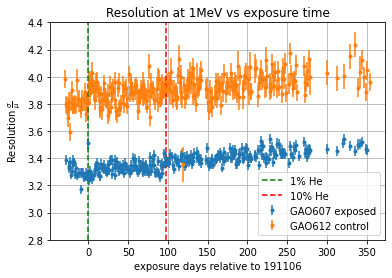

In [6]:
x_0 = process_date(data[0]['date'])
plt.errorbar(x_0,data[0]['resolution'], fmt=".", yerr=data[0]['error'], label='GAO607 exposed')
plt.ylim(2.8,4.4)
plt.xlabel("exposure days relative to 191106")
plt.ylabel(r'Resolution $ \frac{\sigma}{\mu}$')

x_1 = process_date(data[1]['date'])
plt.errorbar(x_1,data[1]['resolution'], fmt=".", yerr=data[1]['error'], label='GAO612 control')
plt.title("Resolution at 1MeV vs exposure time")
plt.grid()
plt.axvline(0, ls='--', color='g', label="1% He")
plt.axvline(98, ls='--', color='r', label="10% He")
plt.legend(loc="lower right")



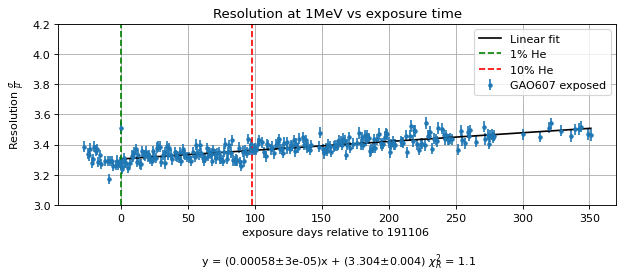

In [7]:
x_0 = process_date(data[0]['date'])[start_0:]
x_array = np.linspace(np.min(x_0), np.max(x_0), 5)
res_0 = data[0]['resolution'][start_0:]
res_err_0 = data[0]['error'][start_0:]

p_guess = [0,3.1]
p_bounds = [[0,3],[1,3.4]]

popt_0, pcov_0 = curve_fit(xdata=x_0,ydata=res_0,sigma=res_err_0,p0=p_guess,bounds=p_bounds,f=linear)

chi2_0 = chi2(n_par=2, y_err=res_err_0, y_obs=res_0, y_exp=linear(x_0,*popt_0))

plt.figure(num=None, figsize=(9, 3), dpi=80, facecolor='w', edgecolor='k')

plt.errorbar(process_date(data[0]['date']),data[0]['resolution'], fmt=".", yerr=data[0]['error'], label='GAO607 exposed')
plt.plot(x_array,linear(x_array,*popt_0), 'k', label='Linear fit')
plt.ylim(3,4.2)
plt.xlabel("exposure days relative to 191106 \n\n " + r"y = ({:.2}±{:.1})x + ({:.4}±{:.1}) $\chi^2_R$ = {:.2}".format(popt_0[0],np.sqrt(pcov_0[0,0]),popt_0[1],np.sqrt(pcov_0[1,1]), chi2_0))
plt.ylabel(r'Resolution $ \frac{\sigma}{\mu}$')
plt.title("Resolution at 1MeV vs exposure time")
plt.grid()
plt.axvline(0, ls='--', color='g', label="1% He")
plt.axvline(98, ls='--', color='r', label="10% He")
plt.legend(loc="upper right")
plt.savefig("/Users/willquinn/Desktop/pmt_output_files/summary_plots/res_vs_time_ch0.png")

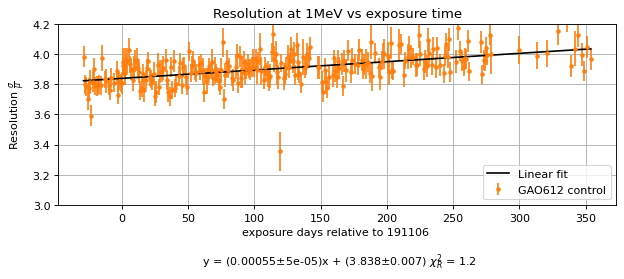

In [8]:
x_1 = process_date(data[1]['date'])[start_1:]
x_array = np.linspace(np.min(x_1), np.max(x_1), 5)
res_1 = data[1]['resolution'][start_1:]
res_err_1 = data[1]['error'][start_1:]

p_guess = [0,3.8]
p_bounds = [[0,3.6],[1,4]]

popt_1, pcov_1 = curve_fit(xdata=x_1,ydata=res_1,sigma=res_err_1,p0=p_guess,bounds=p_bounds,f=linear)
chi2_1 = chi2(n_par=2, y_err=res_err_1, y_obs=res_1, y_exp=linear(x_1,*popt_1))

plt.figure(num=None, figsize=(9, 3), dpi=80, facecolor='w', edgecolor='k')

plt.errorbar(process_date(data[1]['date']),data[1]['resolution'], fmt=".", yerr=data[1]['error'], label='GAO612 control', color='C1')
plt.plot(x_array,linear(x_array,*popt_1), 'k', label='Linear fit')
plt.ylim(3,4.2)
plt.xlabel("exposure days relative to 191106 \n\n " + r"y = ({:.2}±{:.1})x + ({:.4}±{:.1}) $\chi^2_R$ = {:.2}".format(popt_1[0],np.sqrt(pcov_1[0,0]),popt_1[1],np.sqrt(pcov_1[1,1]), chi2_1))
plt.ylabel(r'Resolution $ \frac{\sigma}{\mu}$')
plt.title("Resolution at 1MeV vs exposure time")
plt.grid()
plt.legend(loc="lower right")
plt.savefig("/Users/willquinn/Desktop/pmt_output_files/summary_plots/res_vs_time_ch1.png")

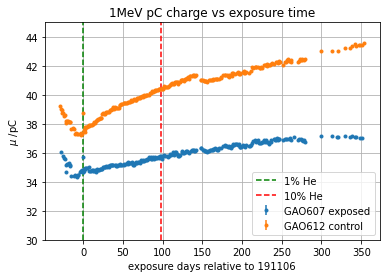

In [9]:
x_0 = process_date(data[0]['date'])
plt.errorbar(x_0,data[0]['mu'], fmt=".", yerr=data[0]['mu_err'], label='GAO607 exposed')
plt.ylim(30,45)
plt.xlabel("exposure days relative to 191106")
plt.ylabel(r'$\mu$ /pC')
plt.title("1MeV pC charge vs exposure time")

x_1 = process_date(data[1]['date'])
plt.errorbar(x_1,data[1]['mu'], fmt=".", yerr=data[1]['mu_err'], label='GAO612 control')
plt.grid()
plt.axvline(0, ls='--', color='g', label="1% He")
plt.axvline(98, ls='--', color='r', label="10% He")
plt.legend(loc="lower right")

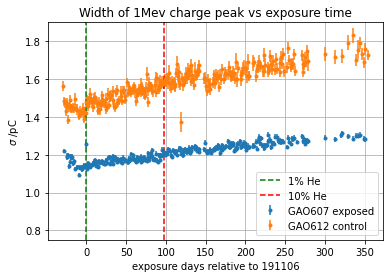

In [10]:
x_0 = process_date(data[0]['date'])
plt.errorbar(x_0,data[0]['sig'], fmt=".", yerr=data[0]['sig_err'], label='GAO607 exposed')
plt.ylim(0.75,1.9)
plt.xlabel("exposure days relative to 191106")
plt.ylabel(r'$\sigma$ /pC')

x_1 = process_date(data[1]['date'])
plt.errorbar(x_1,data[1]['sig'], fmt=".", yerr=data[1]['sig_err'], label='GAO612 control')
plt.title("Width of 1Mev charge peak vs exposure time")
plt.grid()
plt.axvline(0, ls='--', color='g', label="1% He")
plt.axvline(98, ls='--', color='r', label="10% He")
plt.legend(loc="lower right")

In [11]:
print("The ratio of fitted gradients: {:.2} ± {:.1}".format(popt_0[0]/popt_1[0], popt_0[0]/popt_1[0]*np.sqrt( (np.sqrt(pcov_0[0,0])/popt_0[0])**2 + (np.sqrt(pcov_1[0,0])/popt_1[0])**2 )))

The ratio of fitted gradients: 1.0 ± 0.1


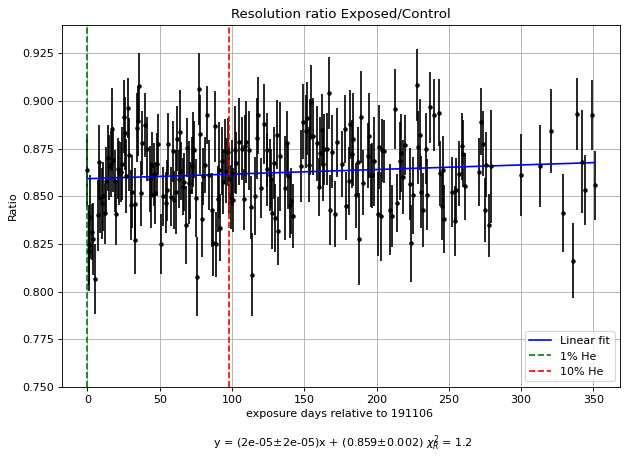

In [12]:
plt.figure(num=None, figsize=(9, 6), dpi=80, facecolor='w', edgecolor='k')
x_0 = process_date(data[0]['date'])[start_0:]
x_1 = process_date(data[1]['date'])[start_1:]

x = []
y = []
y_err = []
for i in range(len(x_0)):
    for j in range(len(x_1)):
        if x_0[i] == x_1[j]:
            x.append(x_0[i])
            y.append(res_0[i]/res_1[j])
            y_err.append(res_0[i]/res_1[j] * np.sqrt( (res_err_0[i]/res_0[i])**2 + (res_err_1[j]/res_1[j])**2 ))
            break
        else:
            pass
        
p_guess = [0,0.85]
p_bounds = [[-0.1,0.8],[0.1,0.9]]
        
popt,pcov = curve_fit(xdata=x,ydata=y,f=linear,sigma=y_err, p0=p_guess, bounds=p_bounds)
chi2__ = chi2(n_par=2,y_err=y_err,y_exp=linear(x,*popt),y_obs=y)
        
plt.errorbar(x, y, yerr=y_err, fmt='.', color='k')
plt.plot(x,linear(x,*popt),'b', label="Linear fit")
plt.title("Resolution ratio Exposed/Control")
plt.xlabel("exposure days relative to 191106 \n\n " + r"y = ({:.1}±{:.1})x + ({:.3}±{:.1}) $\chi^2_R$ = {:.2}".format(popt[0],np.sqrt(pcov[0,0]),popt[1],np.sqrt(pcov[1,1]), chi2__))
plt.ylabel("Ratio")
plt.grid()
plt.ylim(0.75,0.94)
plt.axvline(0, ls='--', color='g', label="1% He")
plt.axvline(98, ls='--', color='r', label="10% He")
plt.legend(loc="lower right")
plt.savefig("/Users/willquinn/Desktop/pmt_output_files/summary_plots/res_ratio.png")